In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import ascii
import astropy.units as u
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['text.latex.preamble'] = [ r'\usepackage{amsmath}']
cat_dir = '/Users/rsimons/Dropbox/foggie_Zgas_Zstar_predictions'
cat_dir = '/Users/rsimons'
halos = [('5016', 'darkblue'), ('2392', 'darkgreen'), ('5036', 'darkred'), ('8508', 'black')]

# Angular Momentum Plots

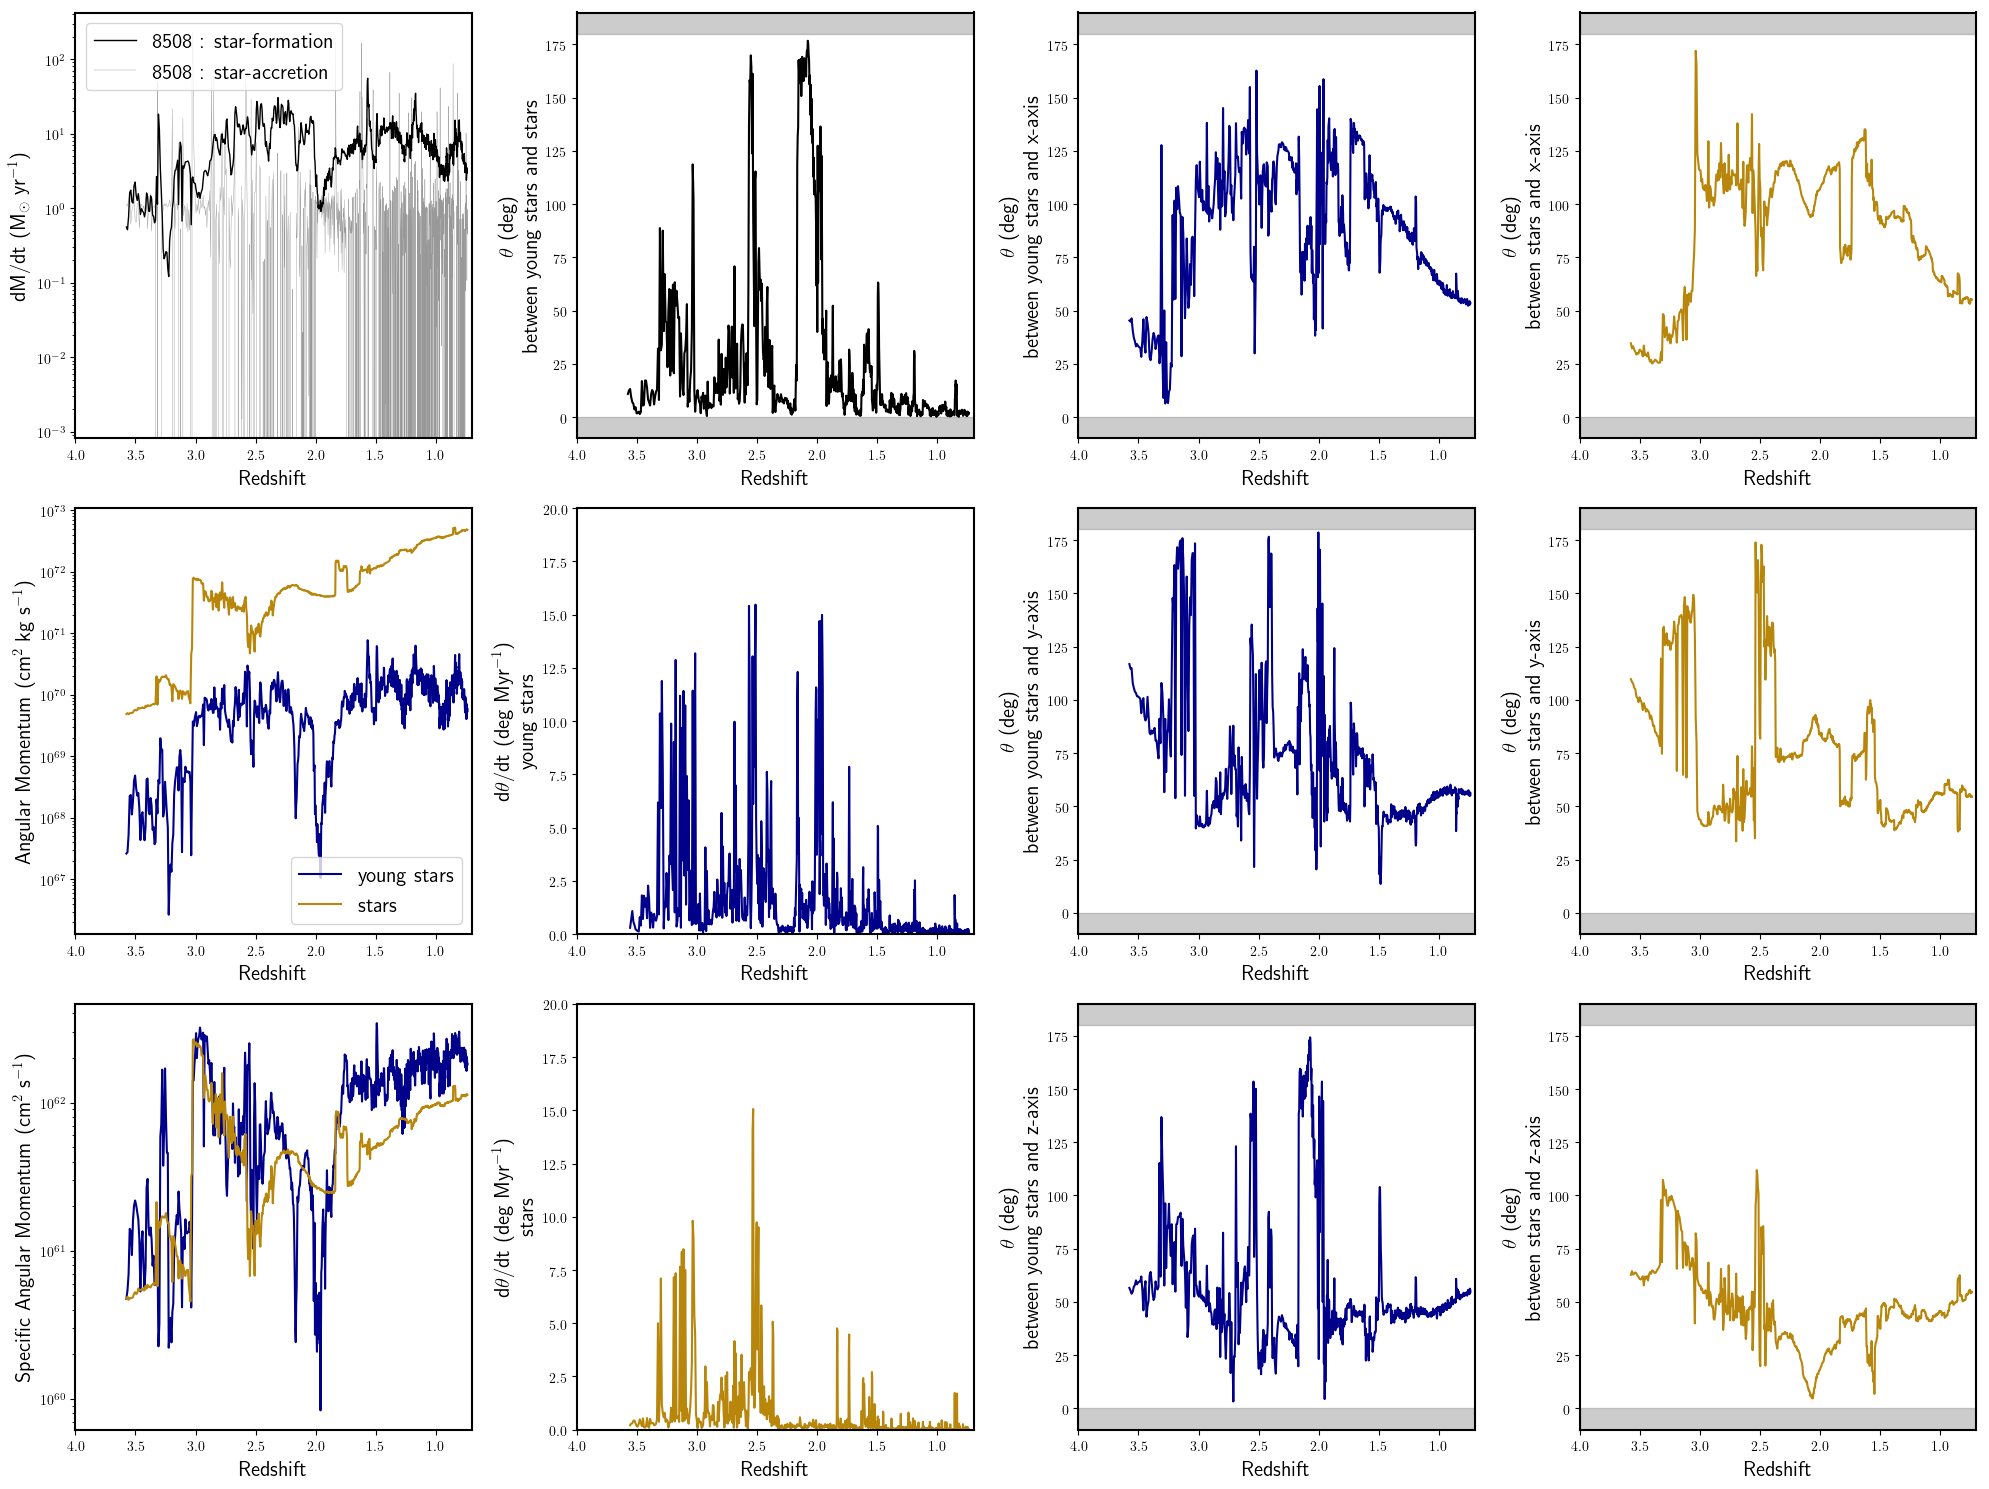

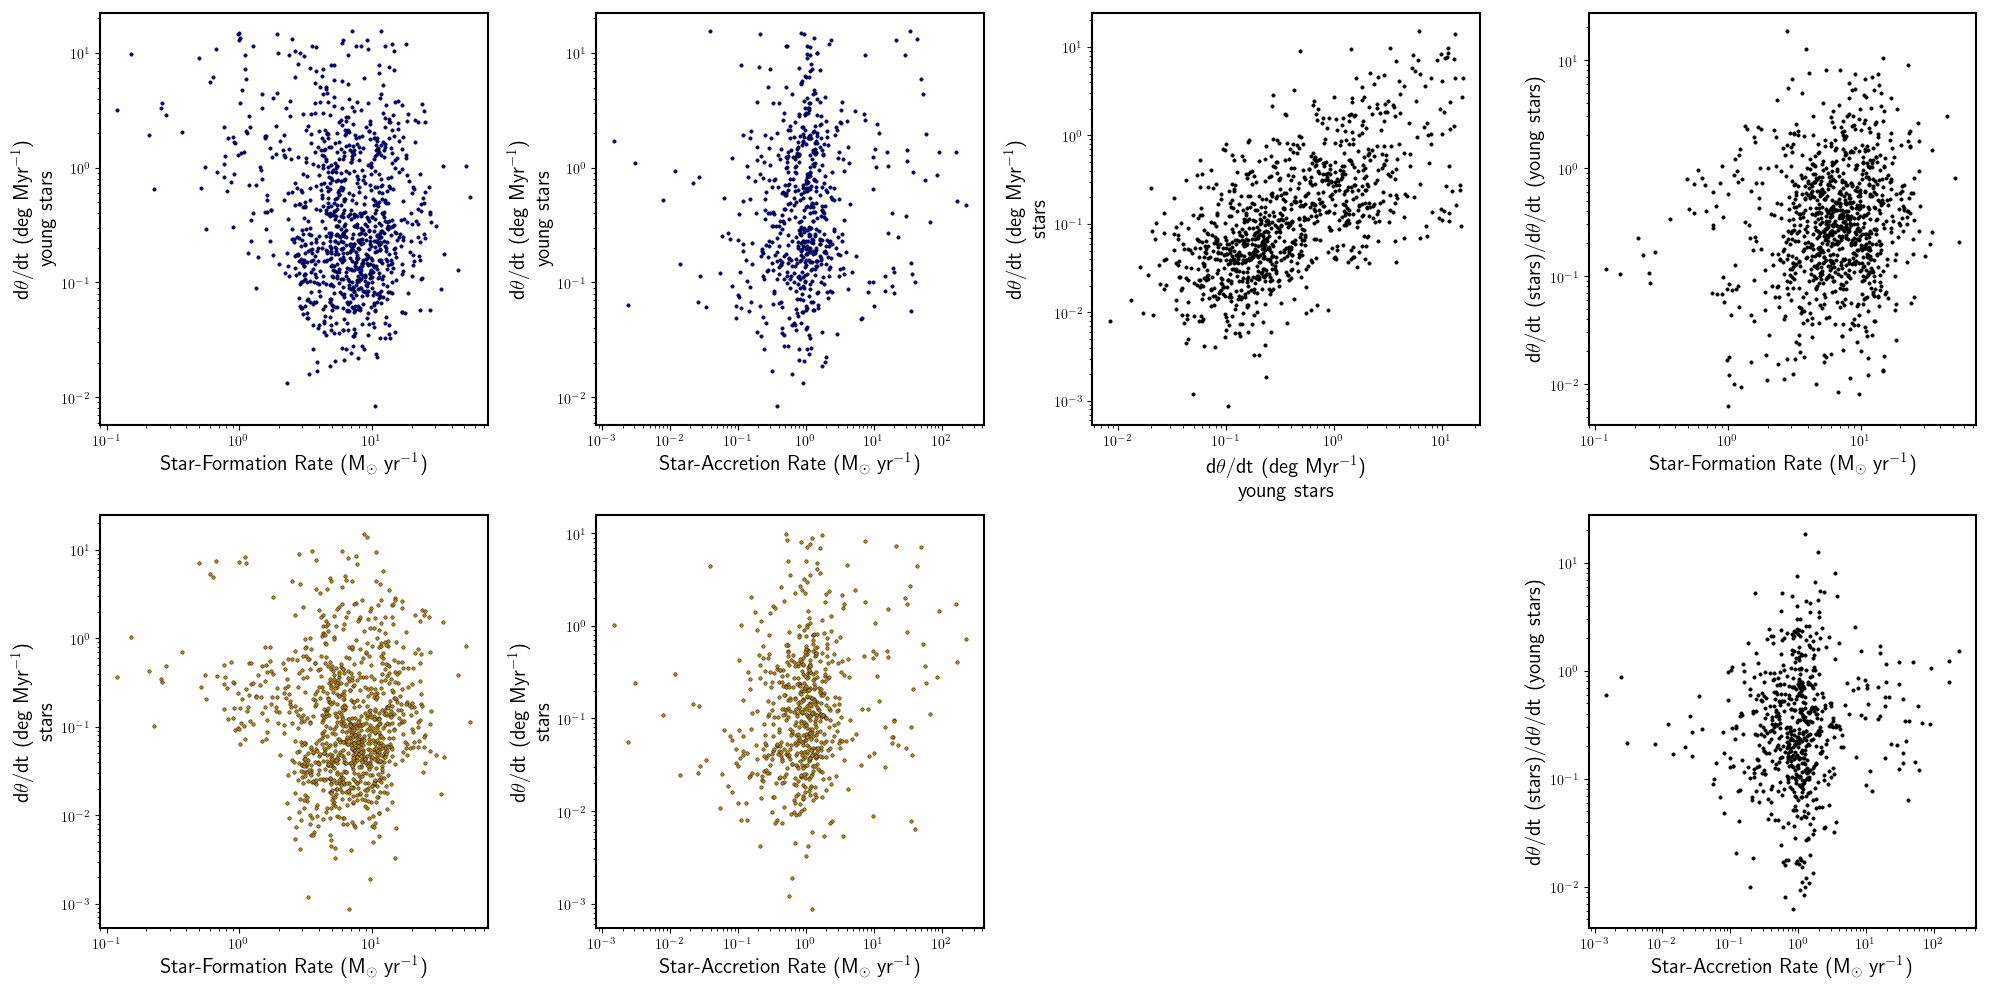

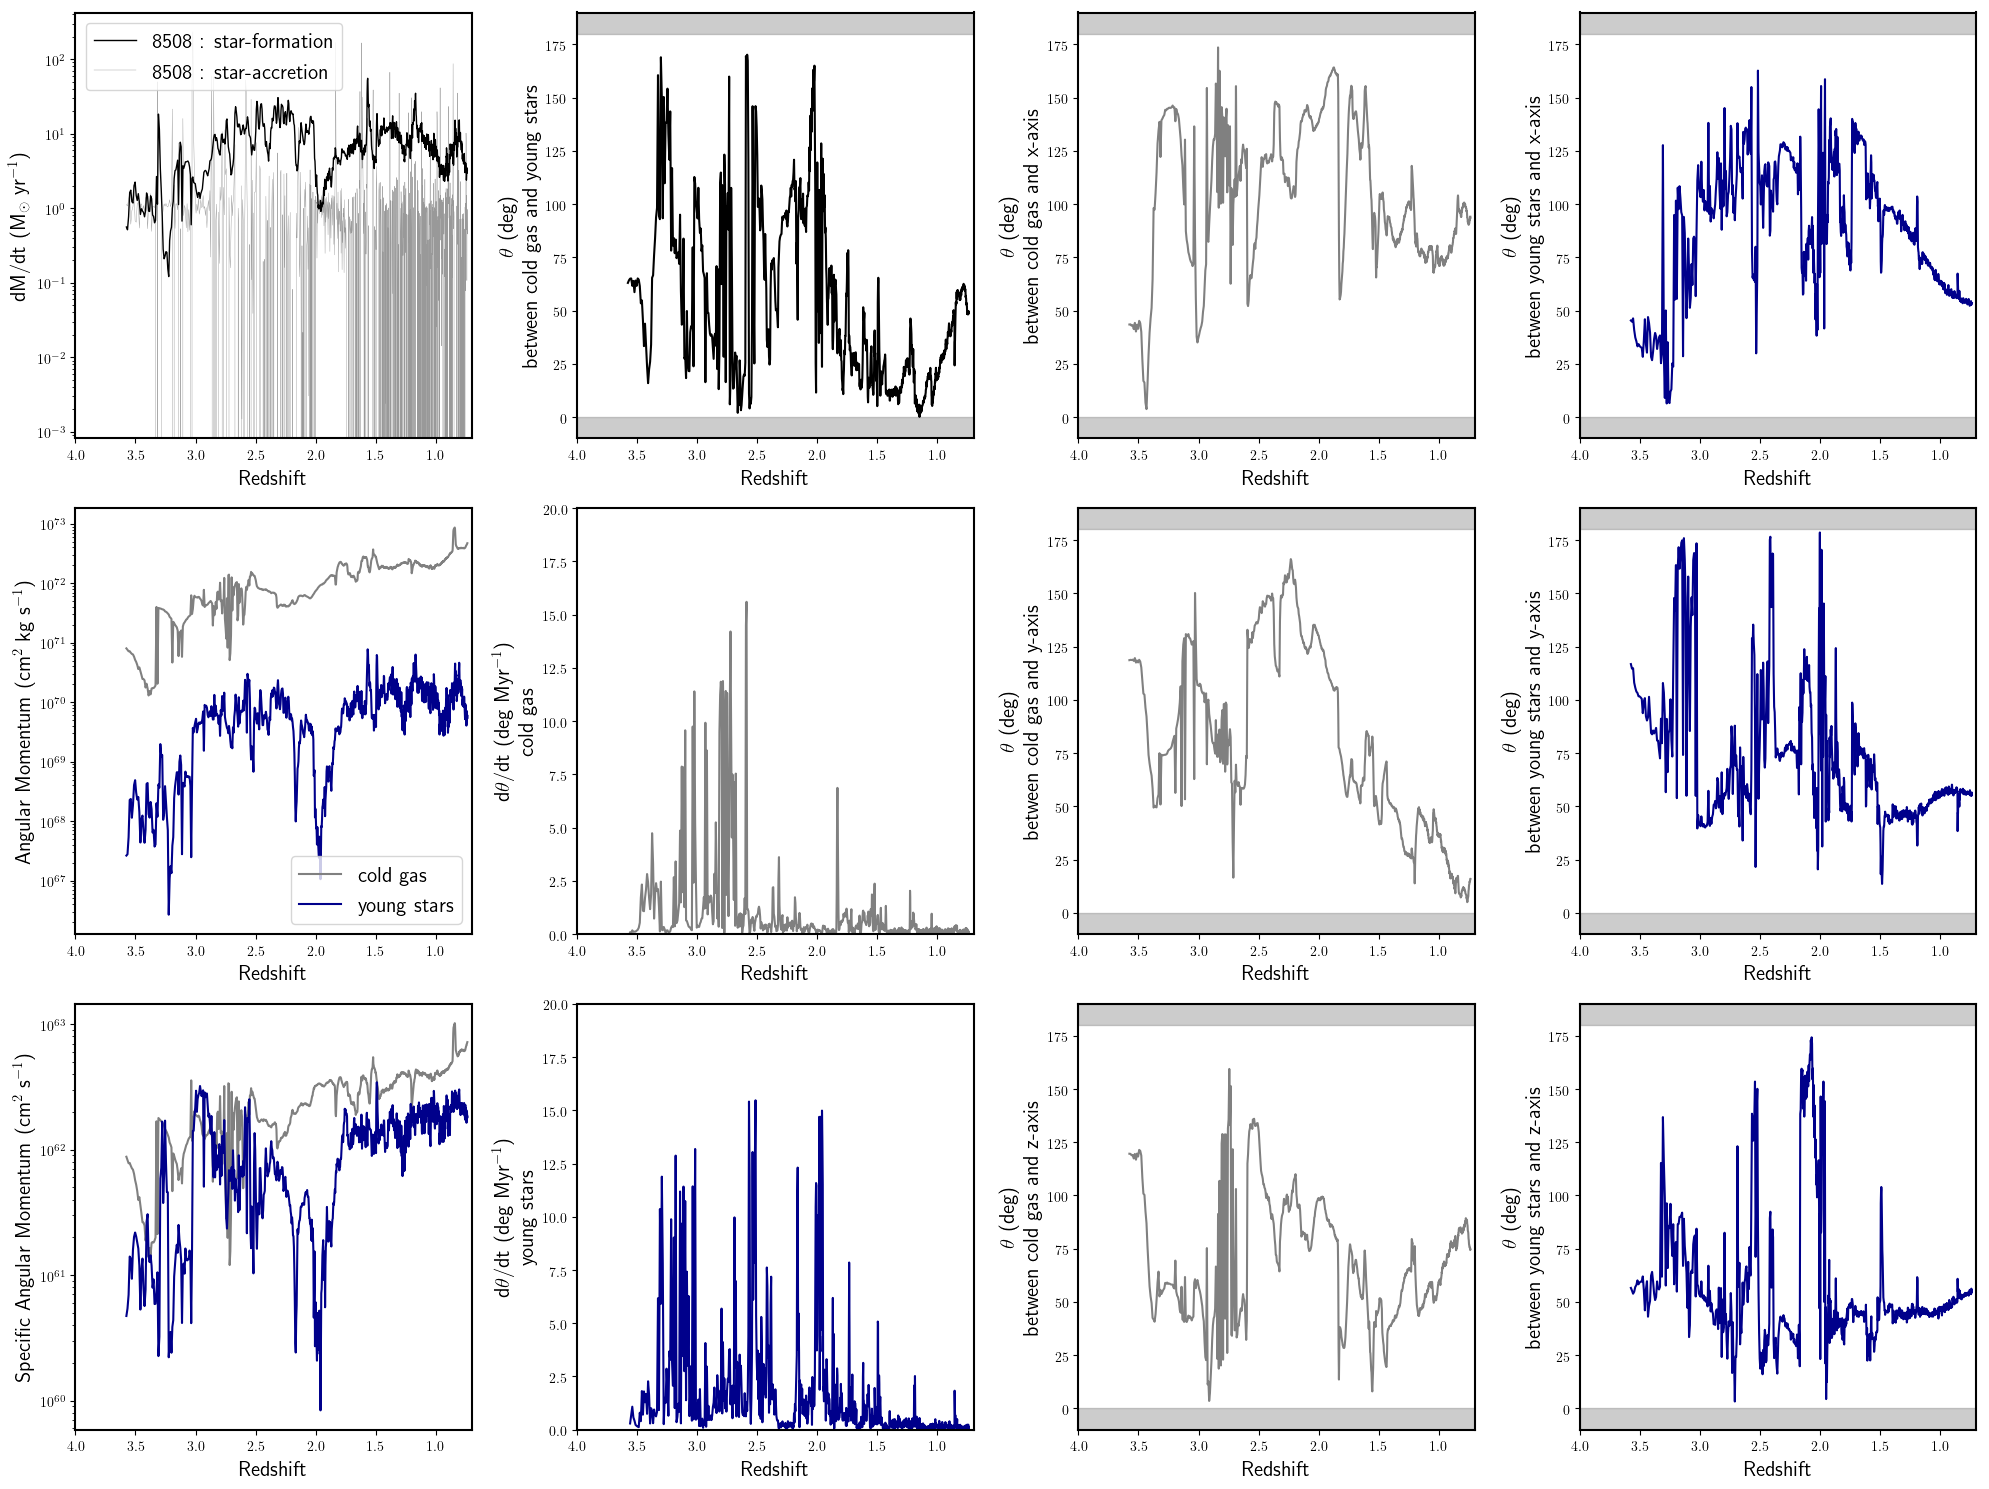

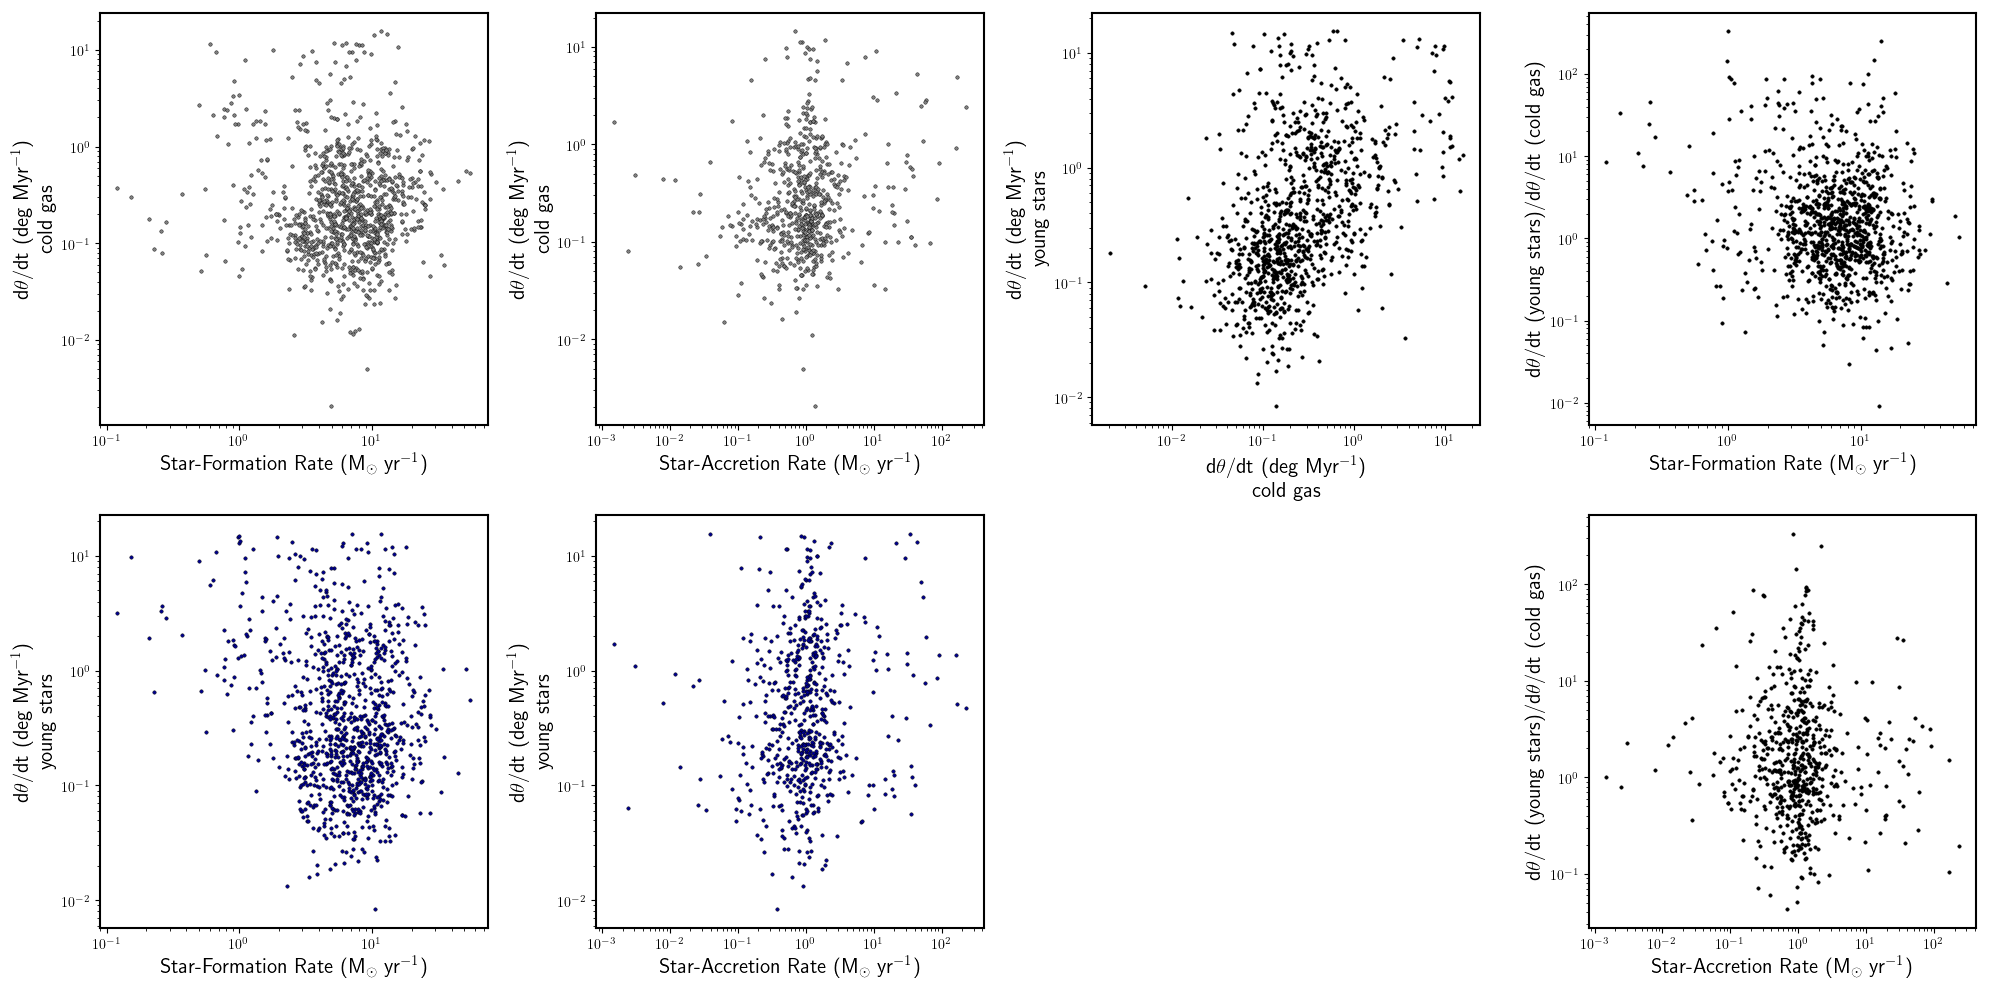

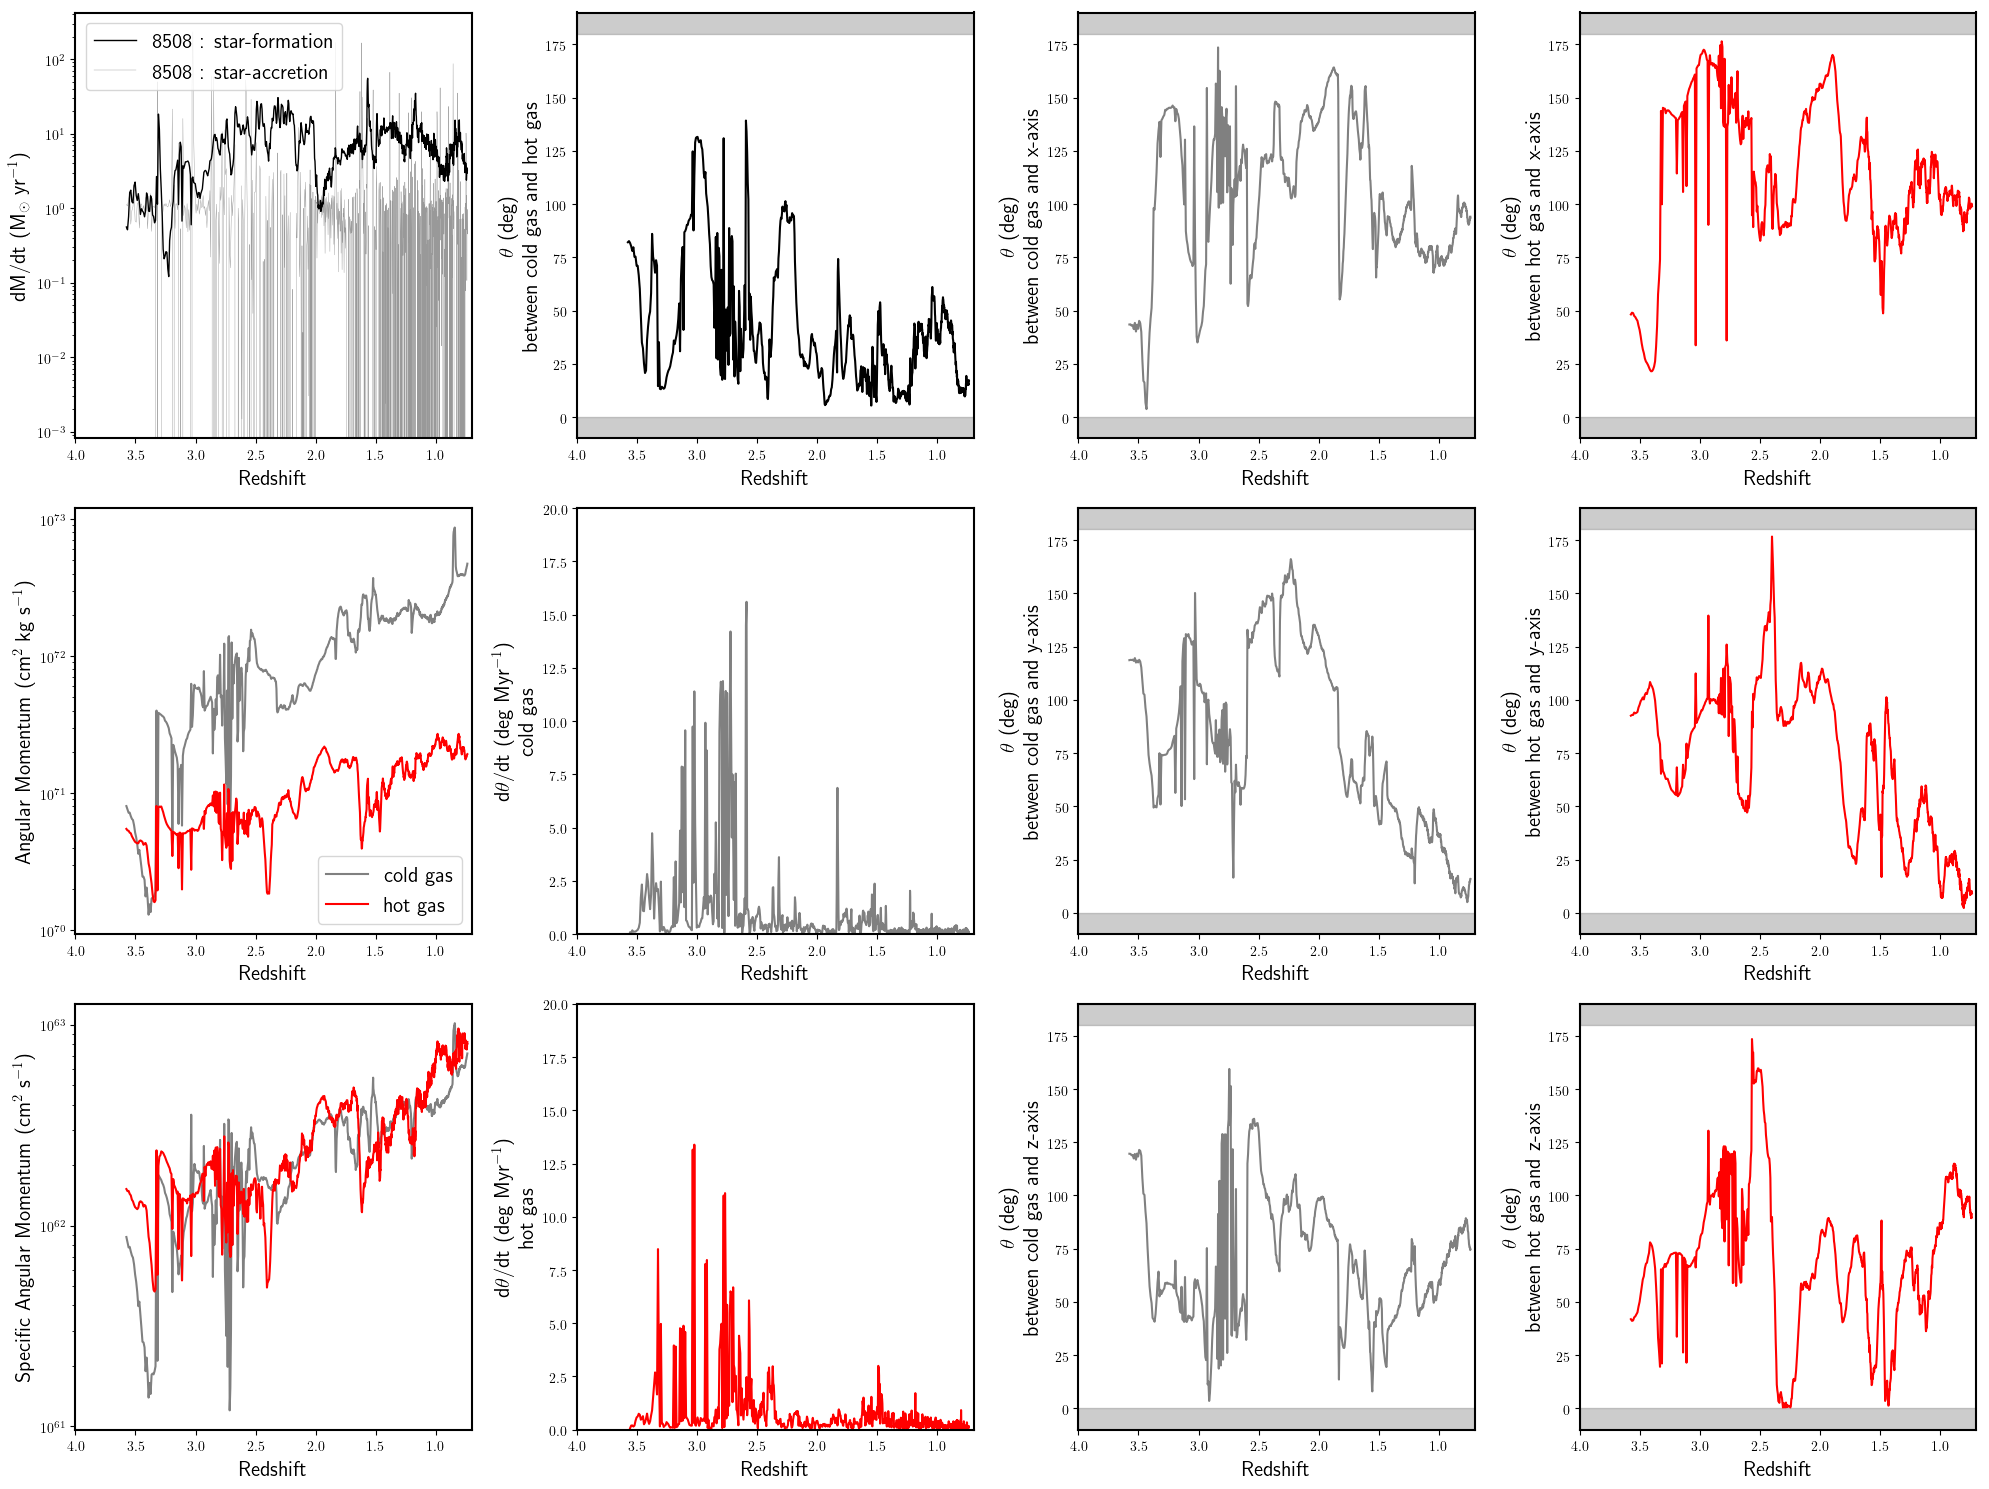

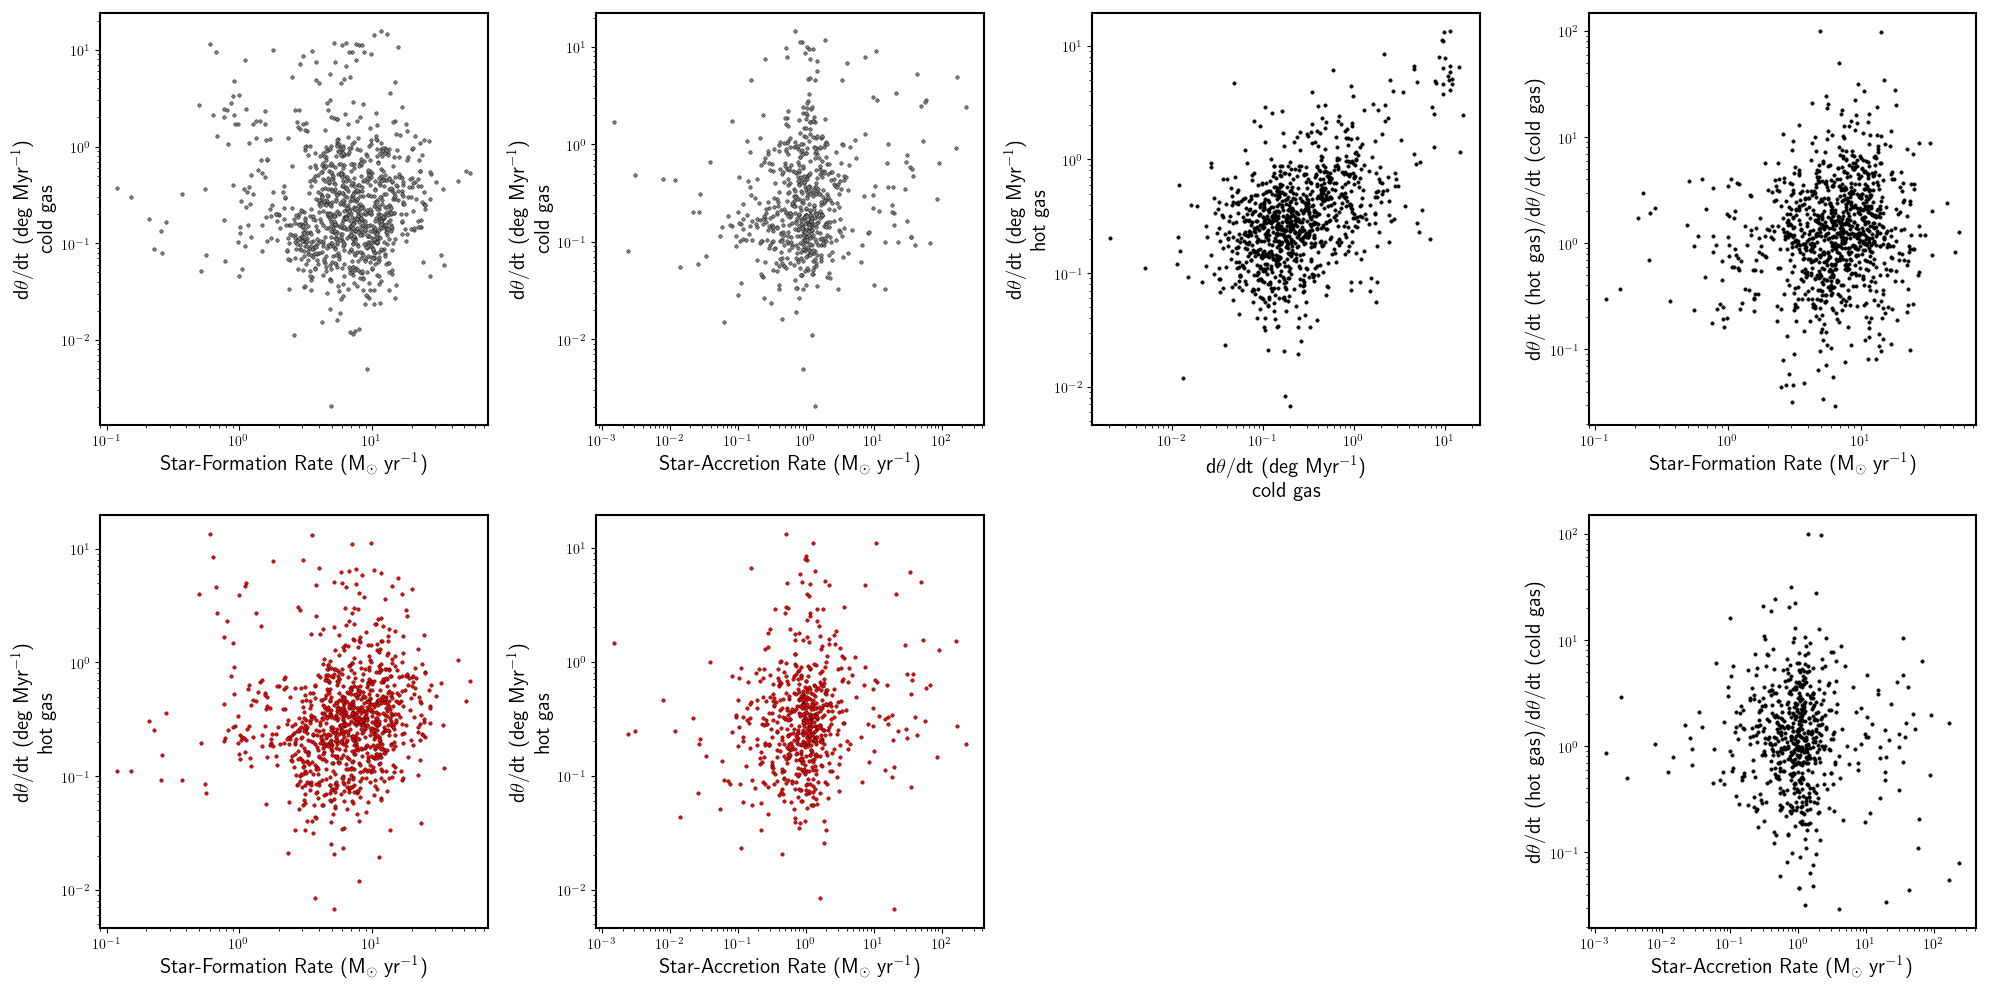

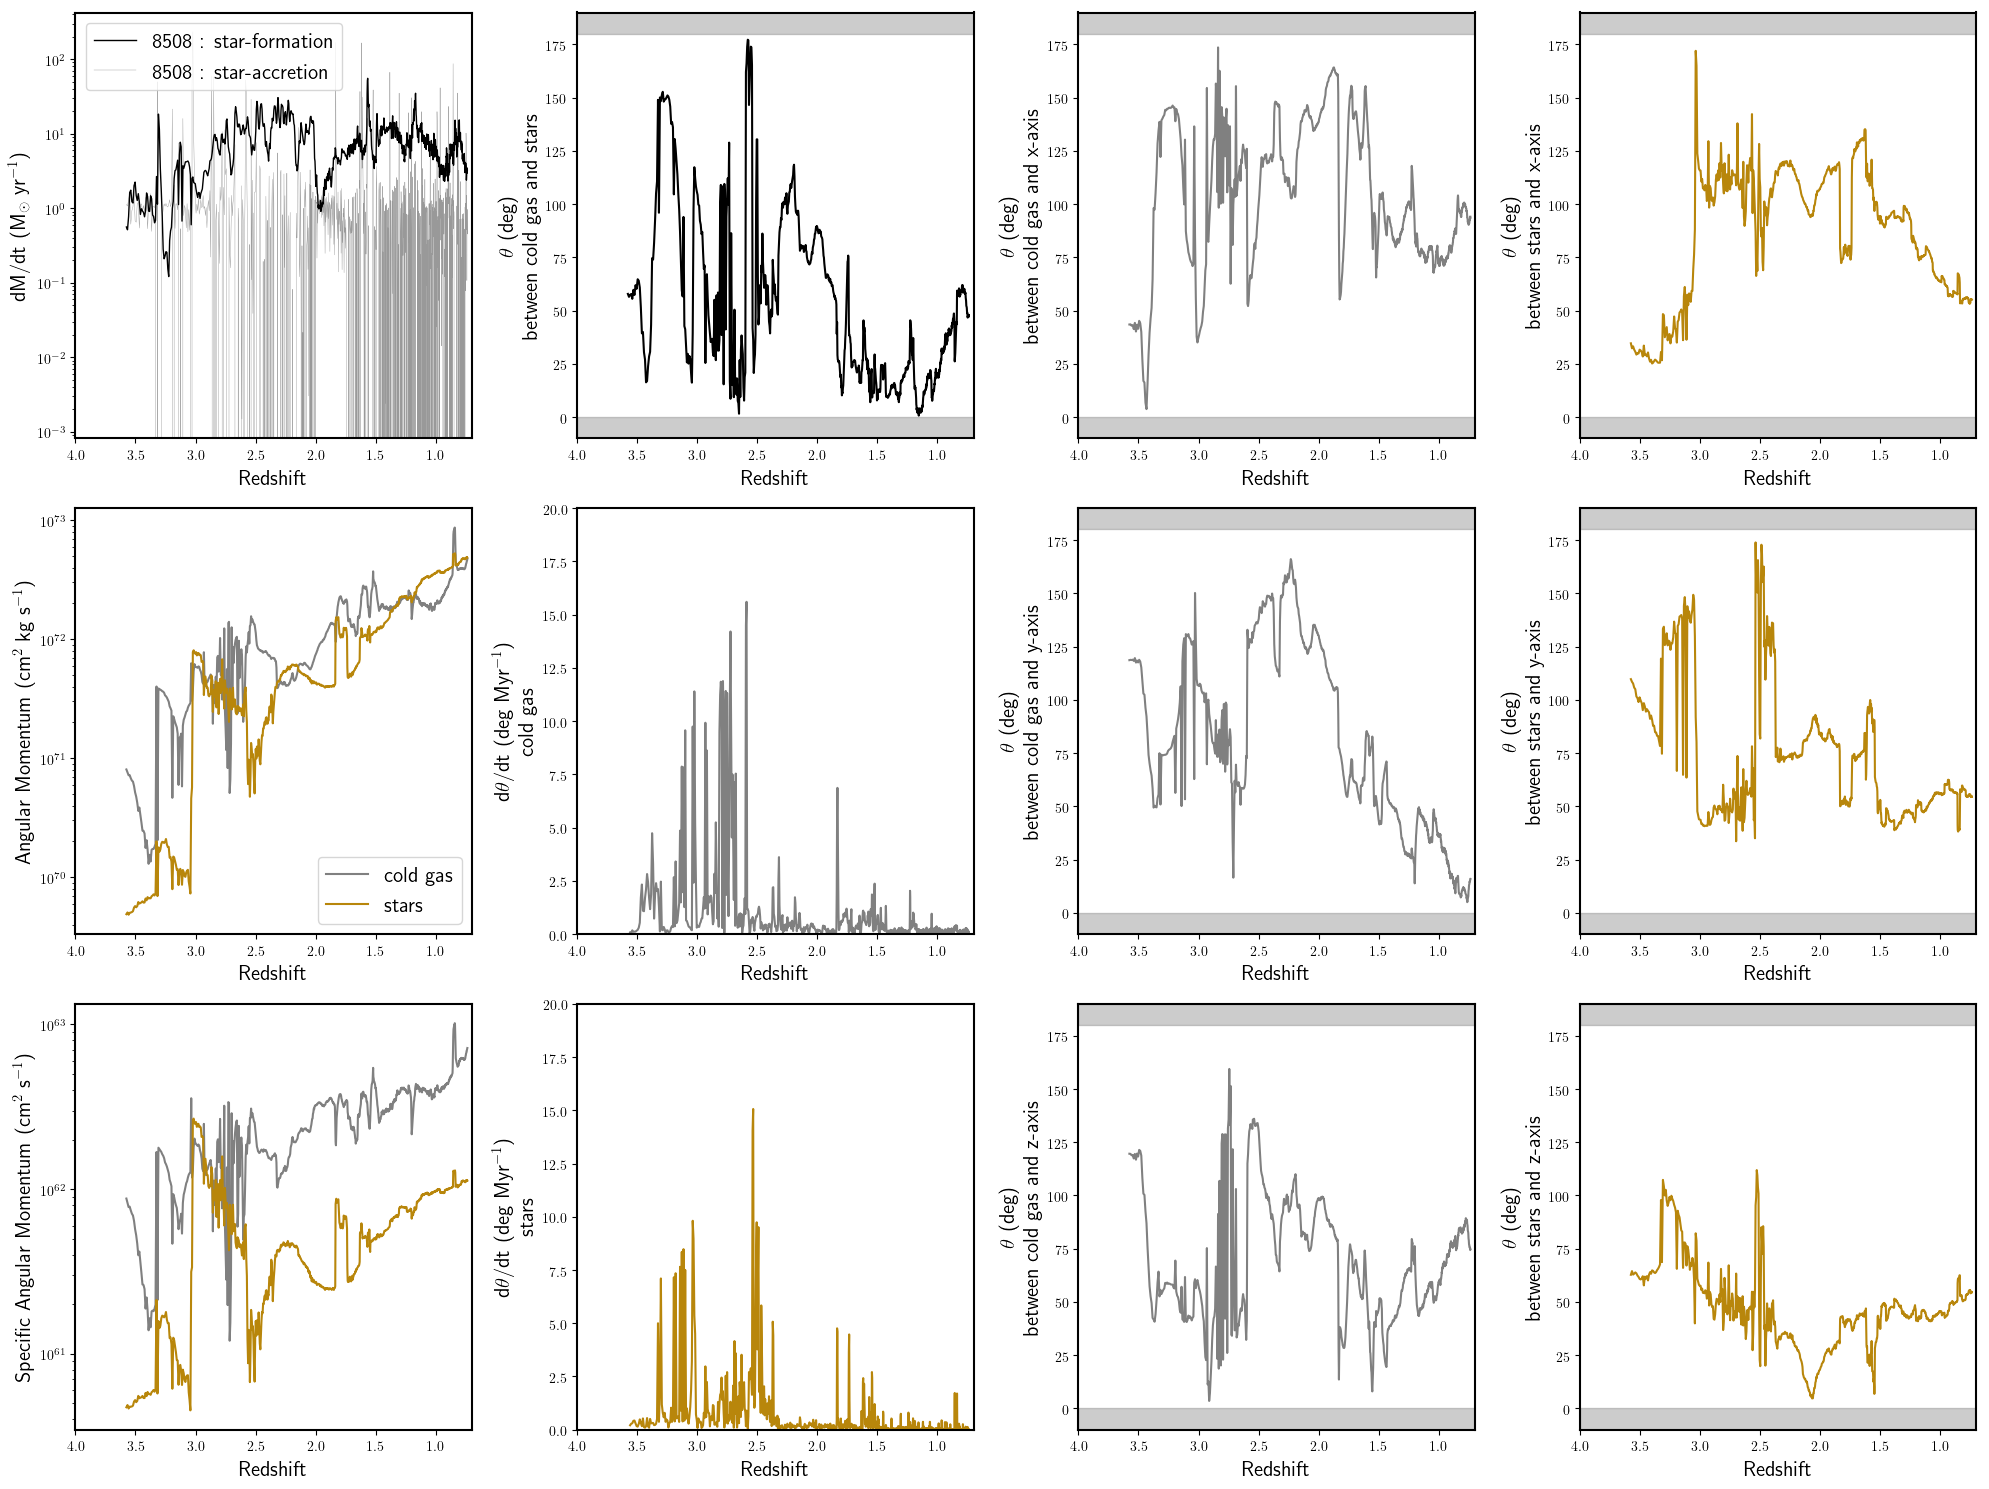

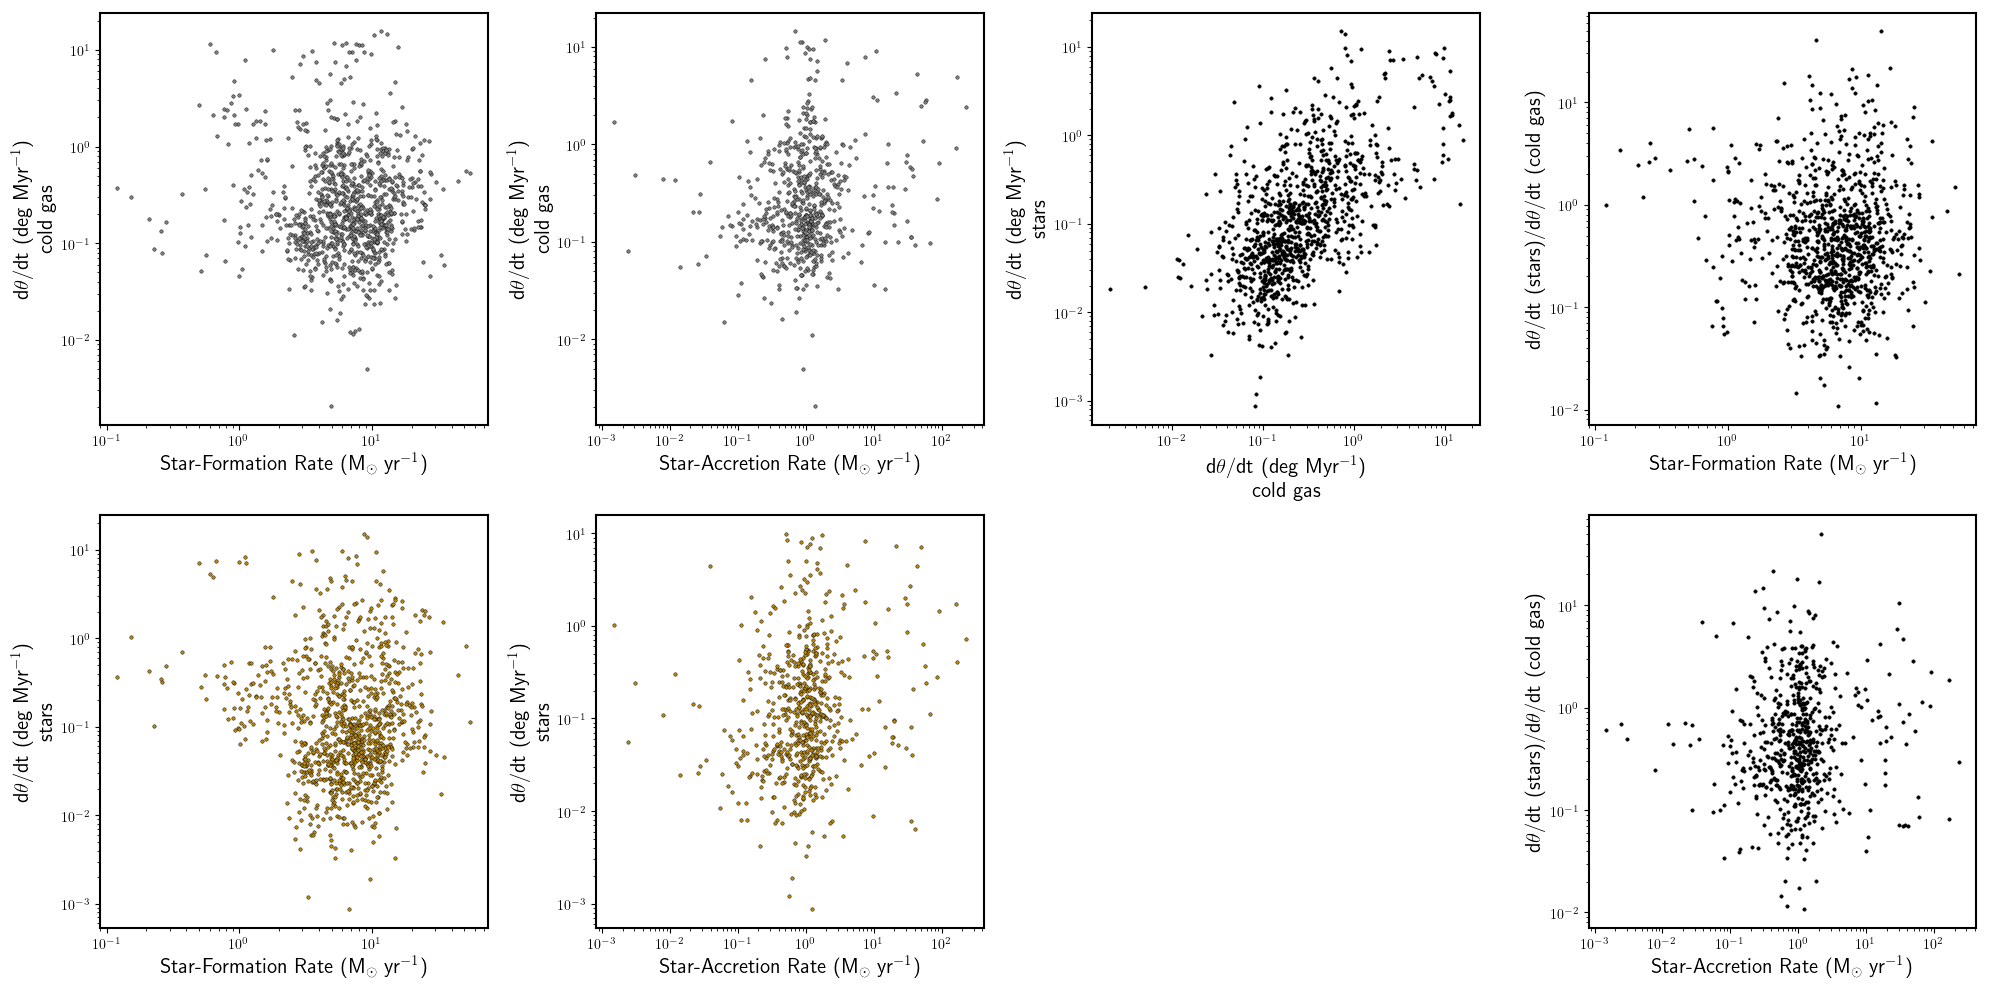

In [30]:
clr_dic = {}
clr_dic['cold_gas'] = 'grey'
clr_dic['young_stars'] = 'darkblue'
clr_dic['stars'] = 'darkgoldenrod'
clr_dic['hot_gas'] = 'red'
clr_dic['gas'] = 'darkgreen'


type_arrs = [('young_stars', 'stars'), ('cold_gas', 'young_stars'), ('cold_gas', 'hot_gas'), ('cold_gas', 'stars')]

for types in type_arrs:

    type_1 = types[0]
    type_2 = types[1]


    for (halo, clr) in halos[-1:]:
        fig, axes = plt.subplots(3,4, figsize = (20,15))
        fig2, axes2 = plt.subplots(2,4, figsize = (20, 10))
        cat = ascii.read(cat_dir + '/FOGGIE_nref11c_%s.cat'%halo)
        L_1 = np.array([cat['%s_L_x'%type_1], cat['%s_L_y'%type_1], cat['%s_L_z'%type_1]])
        L_1_mag = np.sqrt(sum(L_1**2., axis = 0))
        L_2 = np.array([cat['%s_L_x'%type_2], cat['%s_L_y'%type_2], cat['%s_L_z'%type_2]])
        L_2_mag = np.sqrt(sum(L_2**2., axis = 0))

        J_1_mag = L_1_mag/((cat['%s_M'%type_1] * u.Msun)*u.kg)
        J_2_mag = L_2_mag/((cat['%s_M'%type_2] * u.Msun)*u.kg)


        angles   = []
        for i in np.arange(len(L_2[0])):
            dot_product = np.dot(L_1[:,i]/np.linalg.norm(L_1[:,i]), L_2[:,i]/np.linalg.norm(L_2[:,i]))
            angles.append(np.arccos(dot_product)*180./pi)


        up_axis_name = 'z'
        angles_cart = {}
        Ls = [L_1, L_2]
        dtdt = {}
        
        dt_snapshot =  5.379e6
        new_stars       = cat['stars_M'][1:]  - cat['stars_M'][:-1]
        new_young_stars =  cat['SFR'][1:] * dt_snapshot
        dmstars = (new_stars - new_young_stars)/dt_snapshot
        dmstars = concatenate((np.array([0.]), dmstars))
        dmstars -= np.nanmedian(dmstars[dmstars < 0.])
        for j in np.arange(2):
            L_use = Ls[j]
            for uu, up_axis_name in enumerate(['x', 'y', 'z']):
                if up_axis_name == 'x': up_axis = np.array([1,0,0])
                if up_axis_name == 'y': up_axis = np.array([0,1,0])
                if up_axis_name == 'z': up_axis = np.array([0,0,1])
                angles_cart[up_axis_name] = []
                for i in np.arange(len(L_use[0])):
                    dot_product_z = np.dot(L_use[:,i]/np.linalg.norm(L_use[:,i]), up_axis)
                    angles_cart[up_axis_name].append(np.arccos(dot_product_z)*180./pi)
                axes[uu,2+j].plot(cat['redshift'], angles_cart[up_axis_name], '-', color = clr_dic[types[j]], label = halo)
                axes[uu,2+j].set_ylabel(r'$\theta$ (deg)'+'\n' + r'between %s and %s-axis'%(types[j].replace('_', ' '), up_axis_name))


            angles_self = []
            redshift_self = []
            for i in np.arange(len(L_use[0])-2):
                dot_product_t = np.dot(L_use[:,i+2]/np.linalg.norm(L_use[:,i+2]), L_use[:,i]/np.linalg.norm(L_use[:,i]))
                angles_self.append(np.arccos(dot_product_t)*180./pi)
                redshift_self.append(cat['redshift'][i+2])
            axes[1+j,1].plot(redshift_self, np.array(angles_self)/(10.), '-', color = clr_dic[types[j]], label = halo)
            axes[1+j,1].set_ylabel(r'd$\theta$/dt (deg Myr$^{-1}$)' + '\n%s'%(types[j].replace('_', ' ')))
            for col in np.arange(2):
                axes2[j,col].set_ylabel(r'd$\theta$/dt (deg Myr$^{-1}$)' + '\n%s'%(types[j].replace('_', ' ')))

            
            cmap = plt.cm.viridis
            cmap.set_bad('k')
            dtdt[types[j]] = np.array(angles_self)/10.
        

        gd = np.where(dmstars[:-2] > 0.)
        for j in np.arange(2):
            axes2[j,1].plot(dmstars[:-2][gd], dtdt[types[j]][gd] ,'k.', markeredgecolor = 'black',markeredgewidth = 0.3, markersize = 5,  color = clr_dic[types[j]])
            axes2[j,0].plot(cat['SFR'][:-2], dtdt[types[j]] ,'k.', markeredgecolor = 'black',     markeredgewidth = 0.3, markersize = 5, color = clr_dic[types[j]])            
            axes2[j,1].set_xlabel('Star-Accretion Rate (M$_{\odot}$ yr$^{-1}$)')
            axes2[j,0].set_xlabel('Star-Formation Rate (M$_{\odot}$ yr$^{-1}$)')

        axes2[0,2].plot(dtdt[types[0]], dtdt[types[1]] ,'k.', markeredgecolor = 'black',     markeredgewidth = 0.3, markersize = 5, color = 'black')
        axes2[0,3].plot(cat['SFR'][:-2], dtdt[types[1]]/dtdt[types[0]],'k.', markeredgecolor = 'black',     markeredgewidth = 0.3, markersize = 5, color = 'black')
        axes2[1,3].plot(dmstars[:-2][gd], dtdt[types[1]][gd]/dtdt[types[0]][gd],'k.', markeredgecolor = 'black',     markeredgewidth = 0.3, markersize = 5, color = 'black')
        #scat = axes2[0,2].scatter(dtdt[types[0]][gd], dtdt[types[1]][gd], c = np.log10(dmstars[:-2][gd]), marker = "o", cmap = 'viridis')

        axes2[0,3].set_xlabel(r'Star-Formation Rate (M$_{\odot}$ yr$^{-1}$)')
        axes2[1,3].set_xlabel(r'Star-Accretion Rate (M$_{\odot}$ yr$^{-1}$)')
        axes2[0,3].set_ylabel(r'd$\theta$/dt (%s)/d$\theta$/dt (%s)'%(types[1].replace('_', ' '), types[0].replace('_', ' ')))
        axes2[1,3].set_ylabel(r'd$\theta$/dt (%s)/d$\theta$/dt (%s)'%(types[1].replace('_', ' '), types[0].replace('_', ' ')))
        
        axes2[0,2].set_xlabel(r'd$\theta$/dt (deg Myr$^{-1}$)' + '\n%s'%(types[0].replace('_', ' ')))
        axes2[0,2].set_ylabel(r'd$\theta$/dt (deg Myr$^{-1}$)' + '\n%s'%(types[1].replace('_', ' ')))


        axes2[1,2].axis('off')
        
        
        for ax in axes2.ravel(): 
            ax.set_yscale('log')
            ax.set_xscale('log')

        axes[0,0].plot(cat['redshift'], cat['SFR'], '-', color = 'black', label = halo+' : star-formation', linewidth = 1)                    
        axes[0,0].plot(cat['redshift'], dmstars, '-', alpha = 0.4, color = 'black', label = halo+' : star-accretion', linewidth = 0.3)                    

        axes[1,0].plot(cat['redshift'], L_1_mag, '-', color = clr_dic[type_1], label = type_1.replace('_', ' '))                    
        axes[1,0].plot(cat['redshift'], L_2_mag, '-', color = clr_dic[type_2], label = type_2.replace('_', ' '))                    

        axes[2,0].plot(cat['redshift'], J_1_mag, '-', color = clr_dic[type_1], label = type_1.replace('_', ' '))                    
        axes[2,0].plot(cat['redshift'], J_2_mag, '-', color = clr_dic[type_2], label = type_2.replace('_', ' '))                    



        axes[0,1].plot(cat['redshift'], angles, '-', color = 'black', label = halo)

        axes[0,0].set_ylabel('dM/dt (M$_{\odot}$ yr$^{-1}$)')
        axes[1,0].set_ylabel('Angular Momentum (cm$^2$ kg s$^{-1}$)')
        axes[2,0].set_ylabel('Specific Angular Momentum (cm$^2$ s$^{-1}$)')
        axes[0,1].set_ylabel(r'$\theta$ (deg)'+'\n' + r'between %s and %s'%(type_1.replace('_', ' '), type_2.replace('_', ' ')))

        for ax in axes[:,0]:ax.set_yscale('log')

        for ax in axes.ravel():
            ax.set_xlabel('Redshift')
            ax.set_xlim(4, 0.7)


        for a, ax in enumerate(axes.ravel()):
            if a%4 !=0:
                #ax.axhline(y = 180, color = 'black')
                #ax.axhline(y = 0, color = 'black')
                ax.set_ylim(-10,190)
                ax.axhspan(ymin = -10, ymax = 0, color = 'grey', alpha = 0.4)
                ax.axhspan(ymin = 180, ymax = 190, color = 'grey', alpha = 0.4)

        for ax in axes[1:,1]: ax.set_ylim(0, 20)
        axes[0,0].legend(loc = 2, fontsize = 15)
        axes[1,0].legend(loc = 4, fontsize = 15)

        fig.tight_layout()
        fig2.tight_layout()
        plt.show()
        fig2.savefig('dMdt-AM_%s-%s|%s.png'%(halo, type_1, type_2), dpi = 400)
        fig.savefig('AM_%s-%s|%s.png'%(halo, type_1, type_2), dpi = 400)
        

In [17]:
np.log10(dmstars[:-2][gd])

array([ 4.89074849e-02,  2.87536672e-02,  1.12101873e-01,  2.03809197e-01,
       -2.15689762e-01, -3.46523935e-02,  2.07822231e-02,  2.18376993e-01,
       -1.70035152e-01, -1.88586072e-01,  5.85274085e-02,  7.83284552e-02,
       -2.67932953e-01,  4.10852249e-02,  5.71230238e-02, -3.99067998e-02,
        3.50940958e-02, -4.54887028e-02,  1.33549290e-01,  1.57870207e-01,
       -2.76010877e-01,  3.02032121e-02,  4.34979612e-02,  1.94096967e-01,
       -3.11890785e-01,  1.97129150e-02,  2.03492136e-02,  8.77117279e-03,
        5.87044563e-02,  1.69539875e+00, -5.36239043e-01, -1.21487292e-01,
       -1.76451487e-02,  5.72808320e-02,  2.59962364e-02,  6.18413966e-02,
        2.71001821e-02,  1.52637671e-02,  4.97160552e-02,  1.12428476e-01,
        2.07308560e-02,  6.25138024e-02,  1.32976215e+00,  3.08999810e-01,
       -2.72737260e-01,  5.79713595e-02,  5.54918372e-02, -2.29477176e-02,
        8.75122307e-01, -2.76245672e-01,  1.20269406e+00, -9.97250248e-02,
        3.67655253e-02, -

In [42]:
(cat['stars_M'][1] -  cat['stars_M'][0]) -  cat['SFR'][0] * 1.e6

1926275.1106581152

In [14]:
np.log10(dmstars[:-2][gd])

array([ 4.89074849e-02,  2.87536672e-02,  1.12101873e-01,  2.03809197e-01,
       -2.15689762e-01, -3.46523935e-02,  2.07822231e-02,  2.18376993e-01,
       -1.70035152e-01, -1.88586072e-01,  5.85274085e-02,  7.83284552e-02,
       -2.67932953e-01,  4.10852249e-02,  5.71230238e-02, -3.99067998e-02,
        3.50940958e-02, -4.54887028e-02,  1.33549290e-01,  1.57870207e-01,
       -2.76010877e-01,  3.02032121e-02,  4.34979612e-02,  1.94096967e-01,
       -3.11890785e-01,  1.97129150e-02,  2.03492136e-02,  8.77117279e-03,
        5.87044563e-02,  1.69539875e+00, -5.36239043e-01, -1.21487292e-01,
       -1.76451487e-02,  5.72808320e-02,  2.59962364e-02,  6.18413966e-02,
        2.71001821e-02,  1.52637671e-02,  4.97160552e-02,  1.12428476e-01,
        2.07308560e-02,  6.25138024e-02,  1.32976215e+00,  3.08999810e-01,
       -2.72737260e-01,  5.79713595e-02,  5.54918372e-02, -2.29477176e-02,
        8.75122307e-01, -2.76245672e-01,  1.20269406e+00, -9.97250248e-02,
        3.67655253e-02, -

In [85]:
plt.plot?

In [14]:
cat.keys()

['halo',
 'redshift',
 'sim_output',
 'stars_Z',
 'stars_M',
 'stars_L_x',
 'stars_L_y',
 'stars_L_z',
 'young_stars_Z',
 'SFR',
 'young_stars_M',
 'young_stars_L_x',
 'young_stars_L_y',
 'young_stars_L_z',
 'all_gas_Z',
 'all_gas_M',
 'all_gas_L_x',
 'all_gas_L_y',
 'all_gas_L_z',
 'cold_gas_Z',
 'cold_gas_M',
 'cold_gas_L_x',
 'cold_gas_L_y',
 'cold_gas_L_z',
 'hot_gas_Z',
 'hot_gas_M',
 'hot_gas_L_x',
 'hot_gas_L_y',
 'hot_gas_L_z']

# Zgas - Zstar Plots

In [69]:
clr_dic = {}
clr_dic['cold_gas'] = 'grey'
clr_dic['young_stars'] = 'darkblue'
clr_dic['stars'] = 'darkgoldenrod'
clr_dic['hot_gas'] = 'darkred'
clr_dic['gas'] = 'darkgreen'


type_arrs = [('young_stars', 'stars'), ('cold_gas', 'young_stars')]

for types in type_arrs:

    type_1 = types[0]
    type_2 = types[1]


    for (halo, clr) in halos[-1:]:
        fig, axes = plt.subplots(3,4, figsize = (20,15))
        cat = ascii.read(cat_dir + '/FOGGIE_nref11c_%s.cat'%halo)
        L_1 = np.array([cat['%s_L_x'%type_1], cat['%s_L_y'%type_1], cat['%s_L_z'%type_1]])
        L_1_mag = np.sqrt(sum(L_1**2., axis = 0))
        L_2 = np.array([cat['%s_L_x'%type_2], cat['%s_L_y'%type_2], cat['%s_L_z'%type_2]])
        L_2_mag = np.sqrt(sum(L_2**2., axis = 0))

        J_1_mag = L_1_mag/((cat['%s_M'%type_1] * u.Msun)*u.kg)
        J_2_mag = L_2_mag/((cat['%s_M'%type_2] * u.Msun)*u.kg)


        angles   = []
        for i in np.arange(len(L_2[0])):
            dot_product = np.dot(L_1[:,i]/np.linalg.norm(L_1[:,i]), L_2[:,i]/np.linalg.norm(L_2[:,i]))
            angles.append(np.arccos(dot_product)*180./pi)


        up_axis_name = 'z'
        angles_cart = {}
        Ls = [L_1, L_2]
        for j in np.arange(2):
            L_use = Ls[j]
            for uu, up_axis_name in enumerate(['x', 'y', 'z']):
                if up_axis_name == 'x': up_axis = np.array([1,0,0])
                if up_axis_name == 'y': up_axis = np.array([0,1,0])
                if up_axis_name == 'z': up_axis = np.array([0,0,1])
                angles_cart[up_axis_name] = []
                for i in np.arange(len(L_2[0])):
                    dot_product_z = np.dot(L_use[:,i]/np.linalg.norm(L_use[:,i]), up_axis)
                    angles_cart[up_axis_name].append(np.arccos(dot_product_z)*180./pi)
                axes[uu,2+j].plot(cat['redshift'], angles_cart[up_axis_name], '-', color = clr_dic[types[j]], label = halo)
                axes[uu,2+j].set_ylabel(r'$\theta$ (deg)'+'\n' + r'between %s and %s-axis'%(types[j].replace('_', ' '), up_axis_name))


        axes[0,0].plot(cat['redshift'], cat['SFR'], '-', color = 'black', label = halo)                    
        axes[1,0].plot(cat['redshift'], L_1_mag, '-', color = clr_dic[type_1], label = type_1.replace('_', ' '))                    
        axes[1,0].plot(cat['redshift'], L_2_mag, '-', color = clr_dic[type_2], label = type_2.replace('_', ' '))                    

        axes[2,0].plot(cat['redshift'], J_1_mag, '-', color = clr_dic[type_1], label = type_1.replace('_', ' '))                    
        axes[2,0].plot(cat['redshift'], J_2_mag, '-', color = clr_dic[type_2], label = type_2.replace('_', ' '))                    



        axes[0,1].plot(cat['redshift'], angles, '-', color = 'black', label = halo)

        axes[0,0].set_ylabel('Star-Formation Rate (M$_{\odot}$ yr$^{-1}$)')
        axes[1,0].set_ylabel('Angular Momentum (cm$^2$ kg s$^{-1}$)')
        axes[2,0].set_ylabel('Specific Angular Momentum (cm$^2$ s$^{-1}$)')
        axes[0,1].set_ylabel(r'$\theta$ (deg)'+'\n' + r'between %s and %s'%(type_1.replace('_', ' '), type_2.replace('_', ' ')))

        for ax in axes[:,0]:ax.set_yscale('log')

        for ax in axes.ravel():
            ax.set_xlabel('Redshift')
            ax.set_xlim(4, 0.7)


        for ax in axes[:,2]: ax.set_ylim(-10,190)
        for ax in axes[:,3]: ax.set_ylim(-10,190)
        axes[0,1].set_ylim(-10,190)

        for ax in axes[1:,1]: ax.axis('off')

        axes[0,0].legend(loc = 4, fontsize = 15)
        axes[1,0].legend(loc = 4, fontsize = 15)

        fig.tight_layout()
        plt.show()
        fig.savefig('AM_%s-%s|%s.png'%(halo, type_1, type_2), dpi = 400)

-3.9746127540082656e+70
-3.7455019103701977e+70
-3.472735705235447e+70
-3.495157622987243e+70
-3.1212938772723605e+70
-3.198137865461849e+70
-2.8672217912004787e+70
-2.890977579201929e+70
-2.4424366399165753e+70
-2.4796419258914888e+70
-2.1769106201500475e+70


In [107]:
from astropy.table import Table


med_len = 20
gd = []
for i in arange(len(cat['redshift'])):
    min_i = max([i - med_len, 0])
    max_i = min([i+med_len, len(cat['redshift'])])
    med_M = median(cat['stars_M'][min_i:max_i])

    if (cat['stars_M'][i] - med_M)/med_M > -0.3: 
        gd.append(i)

cat_gd = cat[gd]
ascii.write(cat_gd, cat_dir+'/FOGGIE_nref11c_5016.cat',format = 'commented_header', overwrite = True)



In [127]:
ax.axhspan?

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (10,10))


axes[0,0].set_ylabel('Stellar Mass (M$_{\odot}$)')
axes[0,1].set_ylabel('Star-Formation Rate (M$_{\odot}$ yr$^{-1}$)')
axes[1,0].set_ylabel('Z (Z$_{\odot}$)')
axes[1,1].set_ylabel('$\log$ Z$_{{\mathrm{cold, gas}}}$ - $\log$ Z$_{*}$ (dex)')

gas_type = 'cold_gas'
for (halo, clr) in halos:
    cat = ascii.read(cat_dir + '/FOGGIE_nref11c_%s.cat'%halo)
    axes[0,0].plot(cat['redshift'], cat['stars_M'], '-', color = clr, label = halo)                    
    axes[0,1].plot(cat['redshift'], cat['SFR'], '-', color = clr, label = halo)                    
    axes[1,0].plot(cat['redshift'], cat['stars_Z'], '-', color = clr, label = halo)
    axes[1,0].plot(cat['redshift'], cat['%s_Z'%gas_type], '--', color = clr, label = halo)
    axes[1,1].plot(cat['SFR']/cat['stars_M'], log10(cat['%s_Z'%gas_type])-log10(cat['stars_Z']), '.', color = clr,  label = halo)
    

axes[0,0].set_yscale('log')
axes[0,1].set_yscale('log')
axes[1,0].annotate('Z$_*$', (0.1, 0.7), xycoords = 'axes fraction', color = 'black', fontsize = 20)
axes[1,0].annotate('Z$_{{\mathrm{cold, gas}}}$', (0.75, 0.08), xycoords = 'axes fraction', color = 'black', fontsize = 20, fontweight = 'bold')
axes[1,1].axhline(y = 0.0, color = 'black', linestyle = '--')

axes[1,0].set_ylim(0, 3.)


axes[1,1].set_xscale('log')
axes[1,1].set_xlabel('Specific Star-Formation Rate (yr$^{-1}$)')
axes[1,1].set_ylim(-1., 0.5)
for ax in axes.ravel()[:3]:
    ax.set_xlabel('Redshift')
    ax.set_xlim(4, 0.7)
    
axes[0,0].legend(loc = 2)
fig.tight_layout()
plt.show()
fig.savefig('Zgas-Zstar_SSFR.png', dpi = 400)